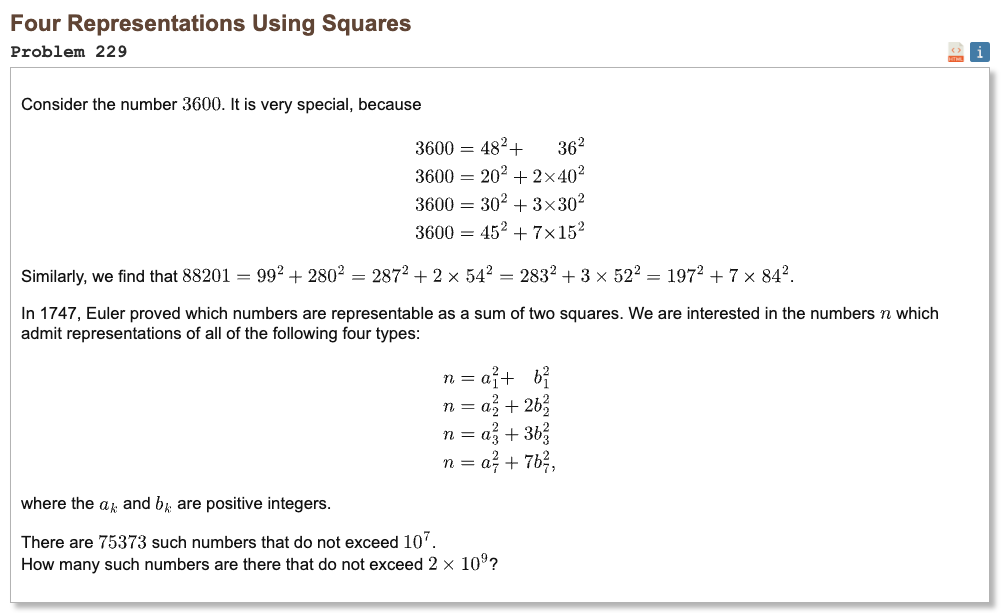

## Initial approach

* look for numbers up to a very large limit that can be formed in four different square based patterns
* handle each pattern on its own and record which numbers it can produce
* in the end, keep only the numbers that appear in all four records
* since the range is huge, process the numbers in smaller consecutive chunks
* for each chunk, keep four simple yes no lists, one for each pattern
* for a chosen value, only certain partners can land inside the current chunk, so you limit the search to those
* mark the matching positions inside the current chunk
* once the chunk is finished, count the positions marked in all four lists and add them to the total

In [1]:
import math

def isqrt(n):
    return int(math.isqrt(n))

def ceil_isqrt(n):
    if n <= 0:
        return 0
    r = int(math.isqrt(n))
    return r if r * r == n else r + 1

def set_bit(arr, i):
    arr[i >> 3] |= 1 << (i & 7)

def get_bit(arr, i):
    return (arr[i >> 3] >> (i & 7)) & 1

def count_block_intersection(bits1, bits2, bits3, bits7, size):
    total = 0
    for i in range(size):
        if get_bit(bits1, i) and get_bit(bits2, i) and get_bit(bits3, i) and get_bit(bits7, i):
            total += 1
    return total

def solve(N=2_000_000_000, block_size=5_000_000):
    ds = [1, 2, 3, 7]
    total = 0
    L = 1
    while L <= N:
        R = min(N + 1, L + block_size)
        size = R - L
        nbytes = (size + 7) >> 3
        bits = {d: bytearray(nbytes) for d in ds}

        for d in ds:
            bmax = isqrt((R - 1) // d)
            for b in range(1, bmax + 1):
                base = d * b * b
                lo = L - base
                hi = (R - 1) - base
                if hi < 1:
                    continue
                a0 = max(1, ceil_isqrt(lo))
                a1 = isqrt(hi)
                if a0 > a1:
                    continue
                for a in range(a0, a1 + 1):
                    v = base + a * a
                    idx = v - L
                    set_bit(bits[d], idx)

        total += count_block_intersection(bits[1], bits[2], bits[3], bits[7], size)
        L = R

    return total

```python
%%time
result = solve()
print("Result:", result)
```

* Note: This implementation is correct but very slow for the full limit (N=2e9). It may run for a long time (it has already been running for 10+ minutes).
* Needs optimization later when I have spare time, especially around the inner loops and marking strategy.